# Cars&Bids dataset Data Cleaning and EDA

In [1]:
# loading requisite packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
# pointing to the copy of the data

# file_path = 'your filepath to the data here'
file_path = "~/OneDrive/Documents/FU_GSB_MSBA/Fall_2022/Web_Analytics/Data/ProjectData/cars_df1.csv"

cars_df = pd.read_csv(file_path)

## Initial Data Profiling

In [3]:
# checking the column names
cars_df.columns

Index(['Make', 'Model', 'Mileage', 'VIN', 'Title Status', 'Location', 'Seller',
       'Engine', 'Drivetrain', 'Transmission', 'Body Style', 'Exterior Color',
       'Interior Color', 'Seller Type', 'URL', 'id', 'year', 'price',
       'auction_outcome', 'bid_count', 'reserve_status', 'num_views',
       'end_datetime', 'num_photos'],
      dtype='object')

In [4]:
# snake casing the columns and making them lowercase
cars_df.columns = cars_df.columns.str.lower().str.replace(' ', '_')
cars_df.columns

Index(['make', 'model', 'mileage', 'vin', 'title_status', 'location', 'seller',
       'engine', 'drivetrain', 'transmission', 'body_style', 'exterior_color',
       'interior_color', 'seller_type', 'url', 'id', 'year', 'price',
       'auction_outcome', 'bid_count', 'reserve_status', 'num_views',
       'end_datetime', 'num_photos'],
      dtype='object')

In [5]:
# checking the shape of the dataset
print(f"{cars_df.shape[0]} records of {cars_df.shape[1]} features")

9963 records of 24 features


In [6]:
# checking the top of the dataset
cars_df.head()
# "Save" got appended to each model name from scraping, that needs cleaning

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,url,id,year,price,auction_outcome,bid_count,reserve_status,num_views,end_datetime,num_photos
0,Audi,S6Save,"288,200",WAULA84A5SN121685,Clean (NC),"Raleigh, NC 27609",rustyone2022,2.2L Turbocharged I5,4WD/AWD,Manual (5-Speed),...,https://carsandbids.com/auctions/rxk84RwQ/1995...,1995-audi-s6-avant,1995,7700,Sold toTommyCarDoc,33,No reserve,9032.0,"Nov 18, 2022 3:49 PM EST",72
1,Ford,MaverickSave,200,3FTTW8E3XNRA95168,Clean (CA),"La Mesa, CA 91942",carDaveSD,2.5L Hybrid I4,Front-wheel drive,Automatic (CVT),...,https://carsandbids.com/auctions/rGN6Z7Q2/2022...,2022-ford-maverick-xlt,2022,29875,Sold toBluejeansjj,13,Reserve,7275.0,"Nov 18, 2022 1:51 PM EST",74
2,Nissan,GT-RSave,"39,500",JN1AR5EF5GM290729,Clean (MD),"Silver Spring, MD 20906",Fainmous,3.8L Turbocharged V6,4WD/AWD,Automatic (6-Speed),...,https://carsandbids.com/auctions/9WbPwOYQ/2016...,2016-nissan-gt-r-premium,2016,68000,Sold toMtnRunner784,26,Reserve,10609.0,"Nov 17, 2022 3:59 PM EST",51
3,Audi,R8Save,"10,400",WUABAAFX9J7902416,Clean (CA),"Temecula, CA 92592",Dustin1116,5.2L V10,Rear-wheel drive,Automatic (7-Speed),...,https://carsandbids.com/auctions/9X6kNN0x/2018...,2018-audi-r8-v10-coupe-rws,2018,135000,Sold tod_p_mac,26,Reserve,10057.0,"Nov 17, 2022 1:54 PM EST",62
4,Porsche,BoxsterSave,"55,400",WP0CA298X7U710301,Clean (IL),"Carol Stream, IL 60188",4wheels4me,2.7L Flat-6,Rear-wheel drive,Manual (5-Speed),...,https://carsandbids.com/auctions/KmmyjVYY/2007...,2007-porsche-boxster,2007,21000,Sold toLetsbuyone,22,Reserve,5528.0,"Nov 17, 2022 2:05 PM EST",99


In [7]:
cars_df.tail()
# num_views is missing at the bottom of the dataset, a known flaw as the feature was added to the website in a later update
# imputation could be useful if the feature is useful and the share of missing data isn't too large

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,url,id,year,price,auction_outcome,bid_count,reserve_status,num_views,end_datetime,num_photos
9958,Land Rover,DefenderSave,"47,316",SALLDHMV8LA930542,Clean (SC),"Charleston, SC 29414",RelicImports,3.5L V8,4WD/AWD,Manual (5-speed),...,https://carsandbids.com/auctions/9nbW8GPJ/1994...,1994-land-rover-defender-6-wheeler,1994,32000,"Reserve not met, bid to",44,Reserve,NaN,"Jun 15, 2020 2:02 PM EDT",161
9959,Toyota,Land CruiserSave,"117,273",JT3FJ60G6E1116896,Clean (CO),"Denver, CO 80206",would,4.2L I6,4WD/AWD,Manual (4-speed),...,https://carsandbids.com/auctions/KVGJe7BP/1984...,1984-toyota-land-cruiser,1984,15000,Sold topetercpeterson,38,Reserve,NaN,"Jun 16, 2020 1:06 PM EDT",65
9960,Ford,Focus STSave,"44,388",1FADP3L97HL307089,Clean (OH),"Cincinnati, OH 41075",WillSanders,2.0L Turbocharged I4,Front-wheel drive,Manual (6-speed),...,https://carsandbids.com/auctions/rkJ5jd4g/2017...,2017-ford-focus-st,2017,16500,Sold toThis_is_Defkidd,47,Reserve,NaN,"Jun 23, 2020 1:07 PM EDT",82
9961,Mercedes-Benz,CLS 63 AMGSave,"28,927",WDDLJ7GB6EA106020,Clean (NC),"Jacksonville, FL 32207",pinmaniac,5.5L Twin-Turbocharged V8,4WD/AWD,Automatic (7-speed MCT),...,https://carsandbids.com/auctions/rjpanxeY/2014...,2014-mercedes-benz-cls63-amg-s,2014,37750,Sold toHeavenFox,29,Reserve,NaN,"Jun 23, 2020 2:02 PM EDT",72
9962,Toyota,MR2Save,"83,538",JT2AW15C7F0033655,Clean (PA),"Fairview, PA 16415",itwontstopsnowin,1.6L I4,Rear-wheel drive,Manual (5-speed),...,https://carsandbids.com/auctions/9XNWwoxg/1985...,1985-toyota-mr2,1985,6800,Sold toECRacer,18,Reserve,NaN,"Jun 18, 2020 1:01 PM EDT",93


In [8]:
#checking datatypes
cars_df.dtypes
# mileage should be numeric (int), num_views should be an int, end_datetime should be a datetime

make                object
model               object
mileage             object
vin                 object
title_status        object
location            object
seller              object
engine              object
drivetrain          object
transmission        object
body_style          object
exterior_color      object
interior_color      object
seller_type         object
url                 object
id                  object
year                object
price                int64
auction_outcome     object
bid_count            int64
reserve_status      object
num_views          float64
end_datetime        object
num_photos           int64
dtype: object

In [9]:
# checking for missing values
cars_df.isnull().sum()
# lots of null values in the num_views column--this was expected. Imputation could be a good fix here
# one missing VIN...
cars_df[cars_df["vin"].isna()] # dune buggy, makes sense

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,url,id,year,price,auction_outcome,bid_count,reserve_status,num_views,end_datetime,num_photos
3166,Suspensions Unlimited,Sand Pro 2Save,No Odometer - TMU,NaN,Bill of Sale,"La Habra, CA 90631",brad87s,3.5L Turbocharged V6,Rear-wheel drive,Manual (4-Speed),...,https://carsandbids.com/auctions/rwAbYBwM/2010...,2010-suspensions-unlimited-sand-pro-2,2010,13800,Sold toWjohnson1001,42,No reserve,10176.0,"Apr 29, 2022 1:50 PM EDT",92


In [10]:
# checking the number of unique values in the sensible columns
cars_df[["make", "model", "title_status", "engine", "drivetrain", "transmission", "body_style", "year", "reserve_status"]].nunique()
# title_status should only have two values: Clean title or other
# Transmission should only have two values: automatic or manual

make              112
model             945
title_status      191
engine            569
drivetrain          3
transmission       55
body_style          8
year               44
reserve_status      2
dtype: int64

## Data Cleaning

### Target Variable: Price

count      9963.000000
mean      28116.176754
std       31106.986332
min        1800.000000
25%       10500.000000
50%       17750.000000
75%       33000.000000
max      557000.000000
Name: price, dtype: float64

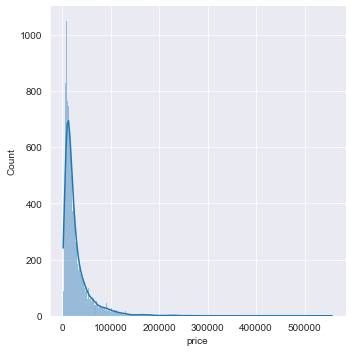

In [11]:
# target variable: price in USD
cars_df["price"] = pd.to_numeric(cars_df["price"])
sns.displot(cars_df["price"], kde = True) # big positive skew, eliminating large outliers might be useful, log-transformation would make it more normal
cars_df["price"].describe()
# looks like most cars are in the $10000 - $100000 range

<AxesSubplot:xlabel='price'>

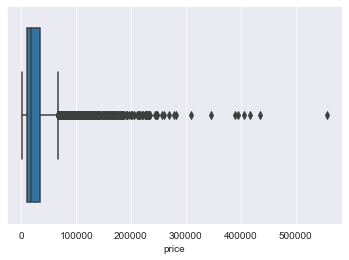

In [12]:
sns.boxplot(data = cars_df, x = "price", )

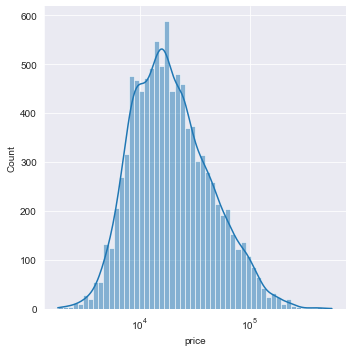

In [13]:
sns.displot(cars_df["price"], log_scale = True, kde = True) # much more normal but would make coefficient interpretation and final price prediction very difficult

# Exploring and cleaning the features

### Observing the 'make' feature

In [112]:
cars_df["make"].value_counts()

BMW                  1734
Mercedes-Benz        1108
Porsche               767
Ford                  657
Toyota                654
                     ... 
Backdraft Racing        1
Race Car Replicas       1
Skoda                   1
MEV                     1
Shelby                  1
Name: make, Length: 112, dtype: int64

In [114]:
# sns.barplot(data = cars_df, x = "make", y = "price", ci = False)
# Need to make a qualifier before plotting, maybe only for brands with 10+ listings

### Cleaning the 'model' feature
- 'Save' was appended to each model name as a result of the scraping

In [14]:
cars_df["model_clean"] = cars_df["model"].str.replace("Save", "")
cars_df["model_clean"]
cars_df["model_clean"].head()
cars_df["model_clean"].tail() # looks good

9958        Defender
9959    Land Cruiser
9960        Focus ST
9961      CLS 63 AMG
9962             MR2
Name: model_clean, dtype: object

### No trim details included with the model, the id column may be helpful for extracting this
- potential workaround: make the id a full string
- remove the year and make info using those columns
- left with the model trim specifics not always included with the model, and in some cases the sequential identifier to differentiate URLs


In [15]:
# taking a look at the id column to see if the trim info on the model can be extracted
# model info is separated with - in the URL but some model names are also separated with - Nissan GT-R for example
cars_df["id_split"] = cars_df["id"].str.split('-')
cars_df["id_split"]

0                         [1995, audi, s6, avant]
1                     [2022, ford, maverick, xlt]
2                  [2016, nissan, gt, r, premium]
3               [2018, audi, r8, v10, coupe, rws]
4                        [2007, porsche, boxster]
                          ...                    
9958    [1994, land, rover, defender, 6, wheeler]
9959                [1984, toyota, land, cruiser]
9960                      [2017, ford, focus, st]
9961        [2014, mercedes, benz, cls63, amg, s]
9962                          [1985, toyota, mr2]
Name: id_split, Length: 9963, dtype: object

### Cleaning the 'mileage' feature
- removing the comma and making it numeric

In [16]:
# removing commas from the mileage numbers
cars_df["mileage_clean"] = cars_df["mileage"].str.replace(",", "")
# using regular expressions to extract numeric characters from the mileage column
cars_df["mileage_clean"] = cars_df["mileage_clean"].str.extract('([0-9]+)')
cars_df[["mileage", "mileage_clean"]][cars_df["mileage_clean"].isna()] # looks good, 24 listings with TMU (missing/broken odometer in most cases)
# TODO debate dropping the columns with missing mileage

,mileage,mileage_clean
335,TMU - No odometer,NaN
386,No Odometer — TMU,NaN
3036,No Odometer - TMU,NaN
3078,No odometer - TMU,NaN
3166,No Odometer - TMU,NaN
3451,Odometer Broken - TMU,NaN
4525,No Odometer - TMU,NaN
4956,No Odometer — TMU,NaN
5583,TMU,NaN
5640,TMU,NaN


In [17]:
cars_df["mileage_clean"] = pd.to_numeric(cars_df["mileage_clean"])
cars_df["mileage_clean"].dtype

dtype('float64')

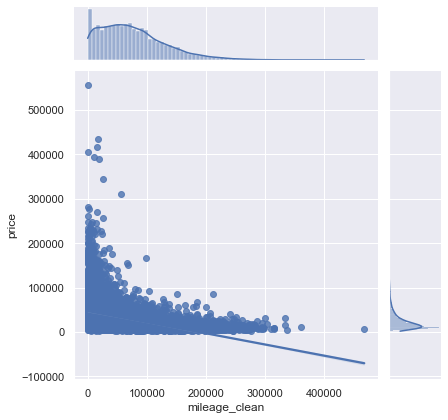

In [111]:
sns.jointplot(data = cars_df, x = "mileage_clean", y = "price", kind = "reg")
# negative relationship between mileage and price, as expected

### cleaning the title_status feature
- need to create a binary clean/not clean title feature
- might be beneficial to split the title status column into 'location' and 'description'

In [18]:
# Making a column "title_desc" a binary feature based on if the string 'clean' appears in the title_status column
# if 'clean' is in the title_desc column: 'clean'
# otherwise 'other'
cars_df["title"] = np.where(cars_df["title_status"].str.lower().str.contains("clean"), "clean", "other")
# extracting the text between parentheses as the title location--might not be a good fix
cars_df.value_counts("title") # clean fix, titles handled

title
clean    9837
other     126
dtype: int64

Text(0, 0.5, 'Mean Price')

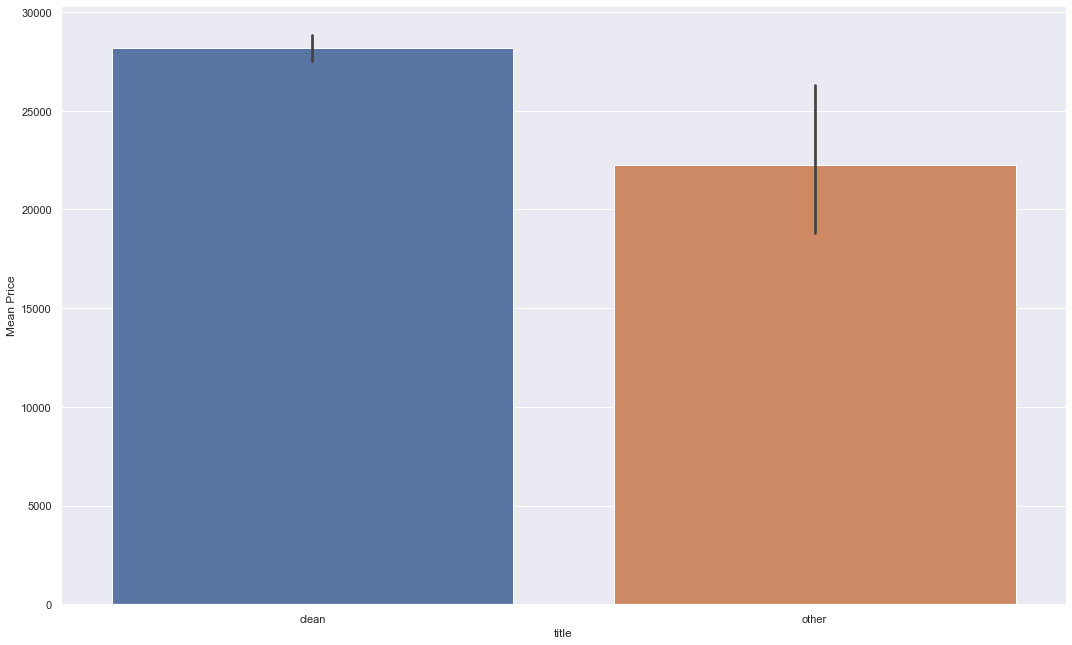

In [107]:
title_price = sns.barplot(data = cars_df, x = "title", y = "price")
title_price.set_ylabel("Mean Price")
# expected result, clean titles bring in more $ on average

In [19]:
# checking feature engineering by pulling up the title_desc column next to each other for cases where "Clean" was not in the original title_status column
cars_df[["title_status", "title"]][cars_df["title"] == "other"]
# TODO: look into registered titles also qualifying as "clean"

,title_status,title
102,Not Actual Mileage (KY),other
235,Exceeds Mechanical Limits (PA),other
288,Registered (VT),other
313,Not Actual Mileage (VA),other
314,Registered (ME),other
...,...,...
9733,Lein (TX),other
9783,Odometer Discrepancy (AZ),other
9796,Salvage (MD),other
9827,Odometer Discrepancy (OH),other


In [20]:
# cars_df["title_location"] = cars_df["title_status"].str.extract('\((.+)\)')
# TODO look into title location feature extraction, handle cases where the location is not explicitly listed in the original title_status column

### splitting the location feature into address features, this needs to be revisited

- removing all characters that aren't alphanumeric or a comma "," or a space " " would be a good start to clean up weirdness from scraping
- alternative is to filter based on which ones have zipcodes and then drop the Canada records--there are at least 188 with canada in the column as shown

In [21]:
cars_df["location"].sample(10, replace = False)

3662      Cape Coral, FL 33914
8515     Lindenhurst, NY 11757
7261         Phoenix, AZ 85020
8734         Danbury, CT 06810
3824           Largo, FL 33774
6002        Santa Fe, NM 87508
1995    Jacksonville, FL 32244
941      Albuquerque, NM 87108
4625       Sebastian, FL 32958
6516          McCall, ID 83638
Name: location, dtype: object

American format seems to be (City), (State abbreviation), (Zipcode)
Canada format seems to be: (City), (Province), Canada

taking a closer look at some of the Canada cases
canada records are not standardized, some use CA instead of Canada to indicate canada, need to separate these from the california records
some of them do have zipcodes...see indexes (4559, 4974, 6892, 8374)

In [22]:
cars_df["location"][cars_df["location"].str.lower().str.contains("canada")]

93           Hamilton, ON, Canada
154           Toronto, ON, Canada
158       Mississauga, ON, Canada
223     Sherwood Park, AB, Canada
285        Belleville, ON, Canada
                  ...            
9828           Calgary, AB Canada
9837         Victoria, BC, Canada
9871          Toronto, ON, Canada
9901           Ottawa, ON, Canada
9914        Vancouver, BC, Canada
Name: location, Length: 188, dtype: object

In [23]:
# using regex to extract 5 digit zipcodes from the location column, creating a new column, ZIP
cars_df["ZIP"] = cars_df["location"].str.extract(r"\b(\d{5})\b")
cars_df["ZIP"].value_counts()
cars_df[cars_df["ZIP"].isna()]

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,bid_count,reserve_status,num_views,end_datetime,num_photos,model_clean,id_split,mileage_clean,title,ZIP
93,Acura,TLSave,"93,000",19UUA75578A802497,"Clean (ON, Canada)","Hamilton, ON, Canada",side,3.5L V6,Front-wheel drive,Manual (6-Speed),...,19,No reserve,13044.0,"Nov 14, 2022 2:26 PM EST",299,TL,"[2008, acura, tl, type, s]",93000.0,clean,NaN
154,BMW,330CiSave,"115,700",WBABD53485PD99814,"Clean (ON, Canada)","Toronto, ON, Canada",meiji1868,3.0L I6,Rear-wheel drive,Manual (6-Speed),...,5,No reserve,9655.0,"Nov 7, 2022 1:37 PM EST",272,330Ci,"[2005, bmw, 330ci, coupe]",115700.0,clean,NaN
158,BMW,328iSave,"21,300",WBAAM5330XKG05842,Clean (ON),"Mississauga, ON, Canada",fastandcurious,2.8L I6,Rear-wheel drive,Manual (5-Speed),...,24,No reserve,6210.0,"Nov 8, 2022 2:54 PM EST",165,328i,"[1999, bmw, 328i, sedan]",21300.0,clean,NaN
223,Audi,AllroadSave,"106,200",WA1YD64B35N015831,"Clean (AB, Canada)","Sherwood Park, AB, Canada",lolroad,2.7L Turbocharged V6,4WD/AWD,Manual (6-Speed),...,47,No reserve,9926.0,"Nov 2, 2022 3:33 PM EDT",295,Allroad,"[2005, audi, allroad, quattro]",106200.0,clean,NaN
285,Nissan,370ZSave,"41,000",JN1AZ4EH5KM420495,"Clean (ON, Canada)","Belleville, ON, Canada",Z34nocap,3.7L Turbocharged V6,Rear-wheel drive,Automatic (7-Speed),...,5,Reserve,8312.0,"Nov 1, 2022 3:29 PM EDT",68,370Z,"[2019, nissan, 370z, coupe]",41000.0,clean,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,BMW,850iSave,"70,800",WBAEG21090CB01757,Clean (Alberta),"Calgary, AB Canada",BMWfan1980,5.0L V12,Rear-wheel drive,Automatic (4-speed),...,45,Reserve,NaN,"Jul 13, 2020 2:05 PM EDT",68,850i,"[1990, bmw, 850i]",70800.0,clean,NaN
9837,Porsche,CaymanSave,"105,600",WP0AA2A83EK170494,Clean,"Victoria, BC, Canada",dr_nick,2.7L Flat-6,Rear-wheel drive,Manual (6-speed),...,28,Reserve,NaN,"Jul 10, 2020 3:00 PM EDT",87,Cayman,"[2014, porsche, cayman]",105600.0,clean,NaN
9871,BMW,M6Save,"26,400",WBSEK93528CY79502,Clean (Canada),"Toronto, ON, Canada",Khanquer,5.0L V10,Rear-wheel drive,Manual (6-Speed),...,28,Reserve,NaN,"Jul 15, 2020 3:06 PM EDT",223,M6,"[2008, bmw, m6, convertible]",26400.0,clean,NaN
9901,Volkswagen,PhaetonSave,"150,300",WVWAF63DX48008358,Clean,"Ottawa, ON, Canada",Josh19,4.2L V8,4WD/AWD,Automatic (6-speed),...,13,No reserve,NaN,"Jun 30, 2020 4:45 PM EDT",59,Phaeton,"[2004, volkswagen, phaeton]",150300.0,clean,NaN


not a true fix. Most of the missing values are Canadian but some have american locations wihtout zipcode entries
See indexes:
- 2262
- 3643
- 4298
- 4552
- 4732
- 4856
- 5101
- 5791
- 6165
- 6251
- 6981
- 7656
- 9142 (6 digit zip from NY)
- 9272 (6 digit zip)
- 9774

In [24]:
# cars_df["city"] = cars_df["location"].str.lower().str.split(",").str[0]
# state
# zip

### Cleaning the Engine Feature
- need to engineer fuel type: object (gas, diesel, electric, hybrid)
- displacement: numeric (in L and in come cases, cc)
- cylinder layout: object (Flat-6, V8, W12, etc.)
- Aspiration: boolean (naturally aspirated or turbo/supercharged)
    - not applicable for electric cars

In [25]:
# engine cleaning code here

### Cleaning the 'drivetrain' feature

In [26]:
cars_df.value_counts("drivetrain") # already clean

drivetrain
Rear-wheel drive     5168
4WD/AWD              3942
Front-wheel drive     853
dtype: int64

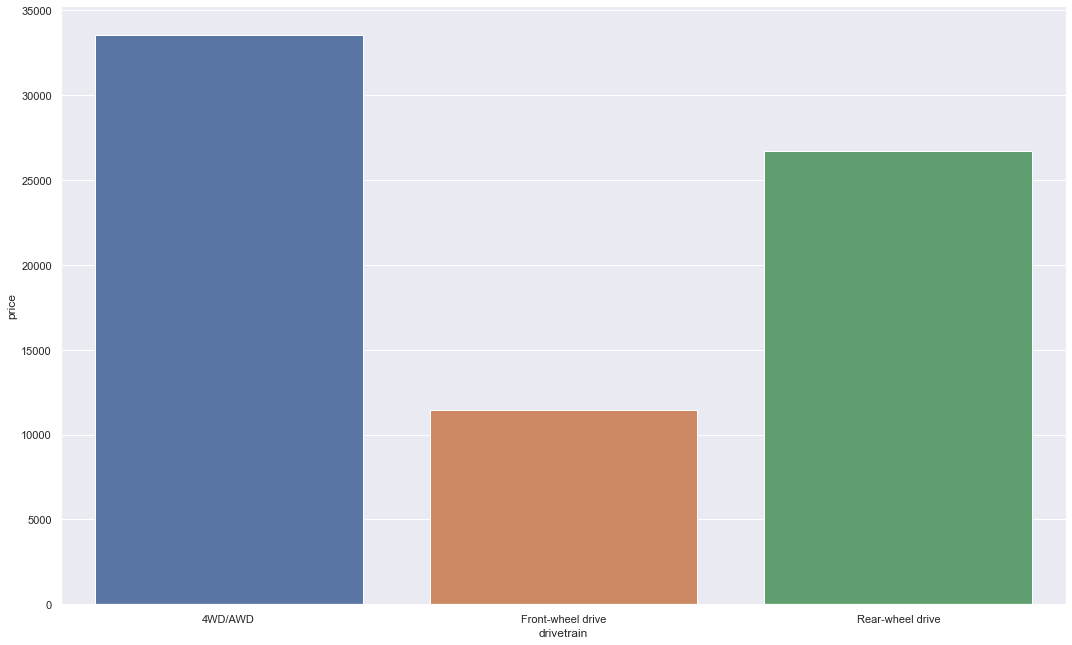

In [104]:
drivetrain_price = sns.barplot(data = cars_df, x = "drivetrain", y = "price", ci = False)
# Historically, FWD prices are substantially less than other drivetrains on average

### Cleaning the 'transmission' Feature
- making a binary feature 'trans' taking the values ('automatic', 'manual')

In [27]:
# engineering a binary variable to indicate whether the car in the listing has an automatic or manual gearbox
cars_df["trans"] = np.where(cars_df["transmission"].str.lower().str.contains("manual"), "manual", "automatic")
cars_df["trans"].value_counts()
cars_df["trans"].isna().sum()
cars_df[["transmission", "trans"]] # looks good

,transmission,trans
0,Manual (5-Speed),manual
1,Automatic (CVT),automatic
2,Automatic (6-Speed),automatic
3,Automatic (7-Speed),automatic
4,Manual (5-Speed),manual
...,...,...
9958,Manual (5-speed),manual
9959,Manual (4-speed),manual
9960,Manual (6-speed),manual
9961,Automatic (7-speed MCT),automatic


<AxesSubplot:xlabel='trans', ylabel='count'>

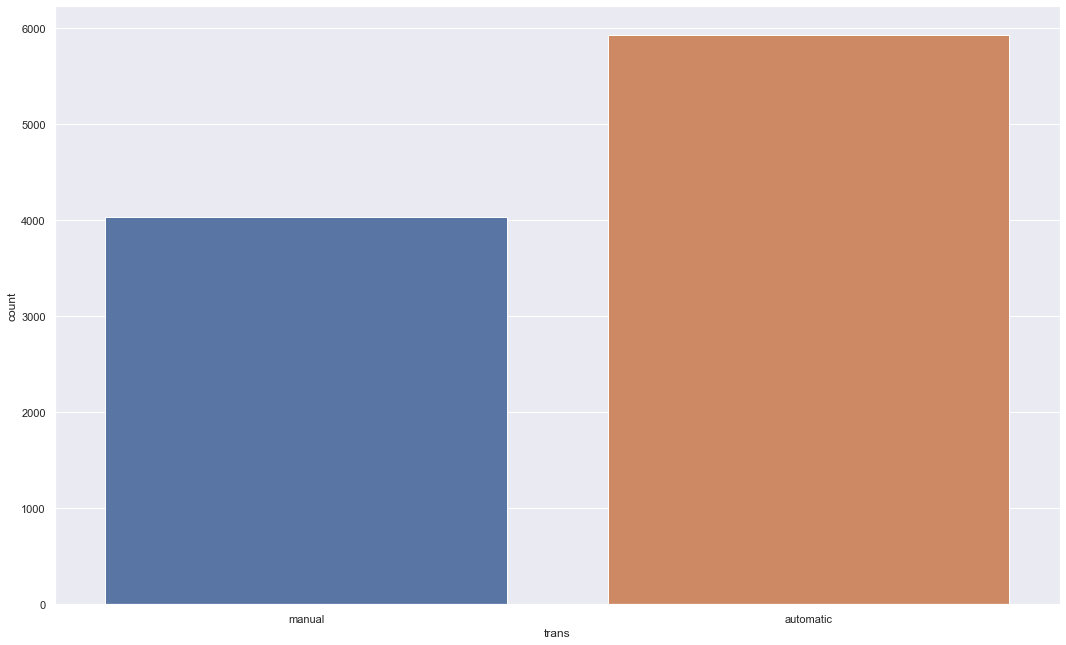

In [101]:
sns.countplot(data = cars_df, x = "trans")
# automatics are more prevalent on the site

Text(0, 0.5, 'Mean Price')

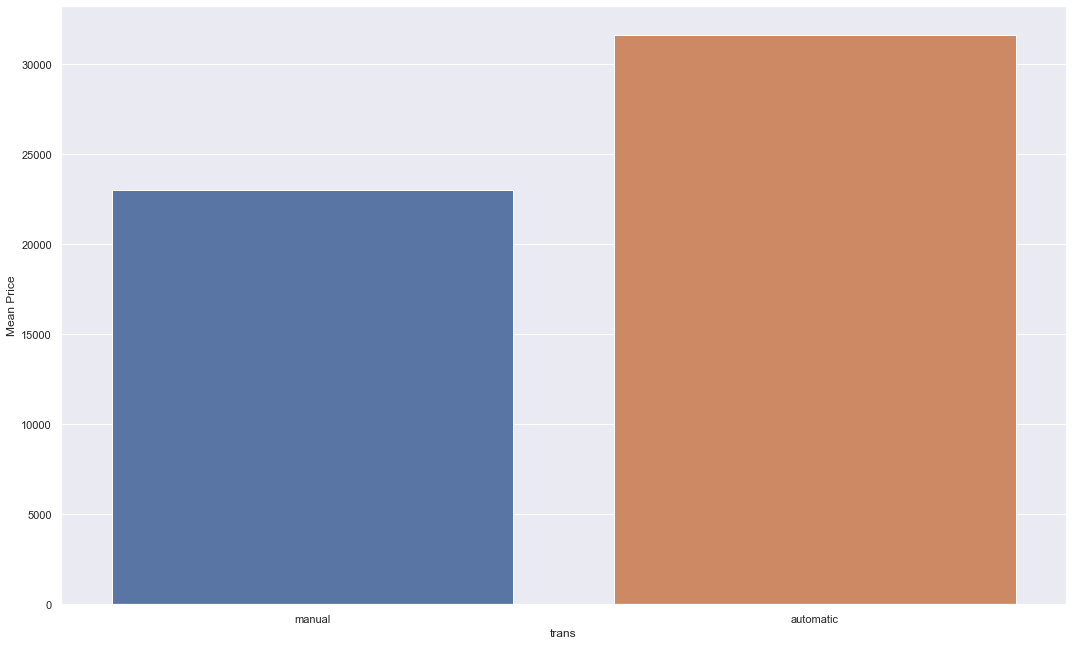

In [103]:
transmission_price = sns.barplot(data = cars_df, x = "trans", y = "price", ci = False)
transmission_price.set_ylabel("Mean Price")
# somewhat unexpected result for an enthusiast car auction site

### Cleaning the 'body_style' feature
- predefined value entered by the site, should be clean

In [28]:
cars_df["body_style"].value_counts()
# 8 body styles

Coupe            2385
Sedan            2339
SUV/Crossover    1772
Convertible      1677
Truck             610
Wagon             573
Hatchback         450
Van/Minivan       157
Name: body_style, dtype: int64

<AxesSubplot:xlabel='body_style', ylabel='count'>

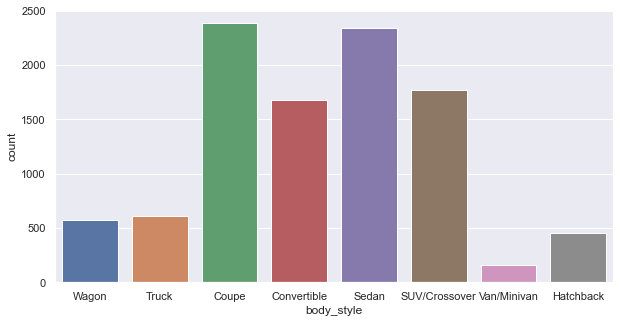

In [29]:
# ploting the body style counts
sns.set(rc={'figure.figsize':(10,5)}) # enlarging the plot so x-axis is legible
sns.countplot(data = cars_df, x = "body_style")

Text(0, 0.5, 'Mean Price')

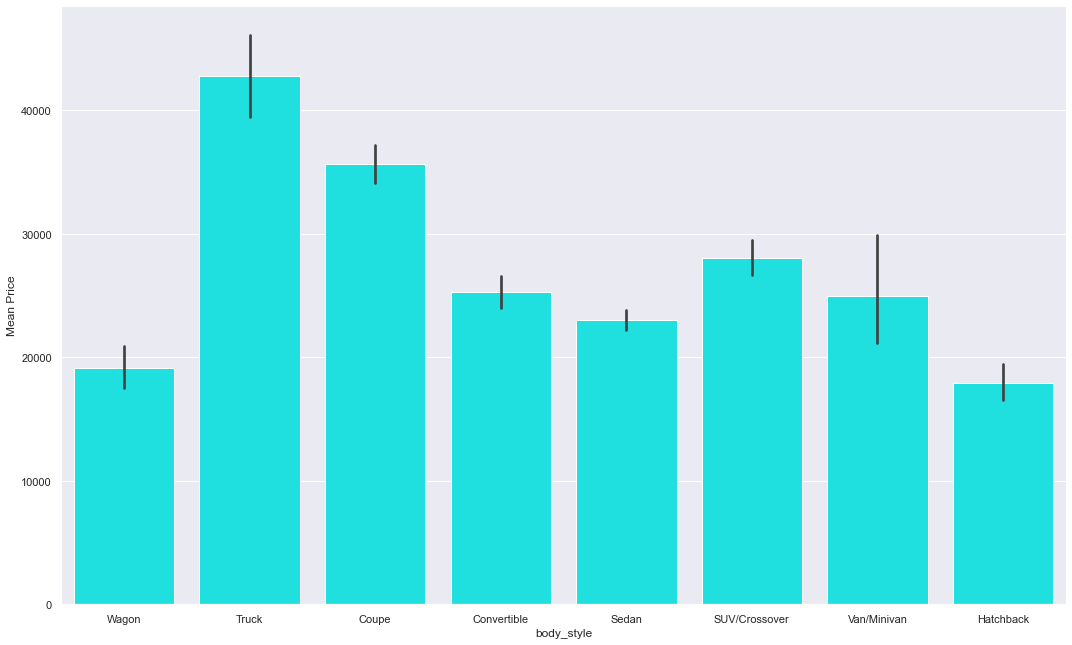

In [100]:
body_style_price = sns.barplot(data = cars_df, x = "body_style", y = "price", color = "cyan")
body_style_price.set_ylabel("Mean Price")
# this is surprising, trucks are selling for the most on average
# Not much variation in sedan prices based on the CI

# Cleaning the 'seller_type' feature

In [30]:
cars_df["seller_type"].value_counts()
# only two root types of sellers, private party and dealer
# some dealers have stipulations attached to the sale, hence the inflated number of categories
# the overwhelming majority are private party sellers

Private Party                                 7932
Dealer                                        1760
Dealer ($40 Temporary Tag)                      15
Dealer ($40 Temp Tag)                           13
Private Party (Lien on title)                   10
                                              ... 
Dealer ($99 Fee for California Buyers)           1
Dealer (GA Sales Tax + $137 Temporary Tag)       1
Dealer ($99 Document Fee)                        1
Dealer ($250)                                    1
Dealer (Sales Tax & Title Fees)                  1
Name: seller_type, Length: 166, dtype: int64

In [31]:
# engineering a binary feature from seller_type with values (Private, Dealer)
cars_df["seller"] = np.where(cars_df["seller_type"].str.lower().str.contains("private"), "private", "dealer")
cars_df["seller"].value_counts() # good

private    7947
dealer     2016
Name: seller, dtype: int64

<AxesSubplot:xlabel='seller', ylabel='count'>

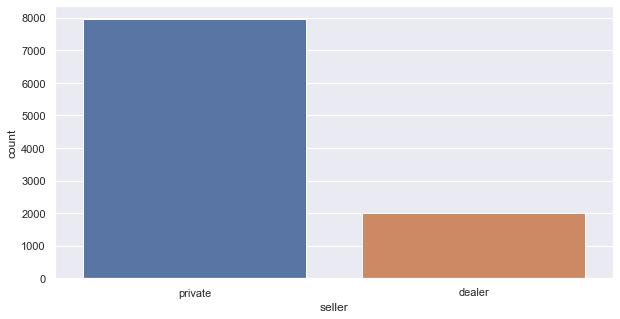

In [32]:
sns.countplot(data = cars_df, x = "seller")

Text(0, 0.5, 'Mean Price')

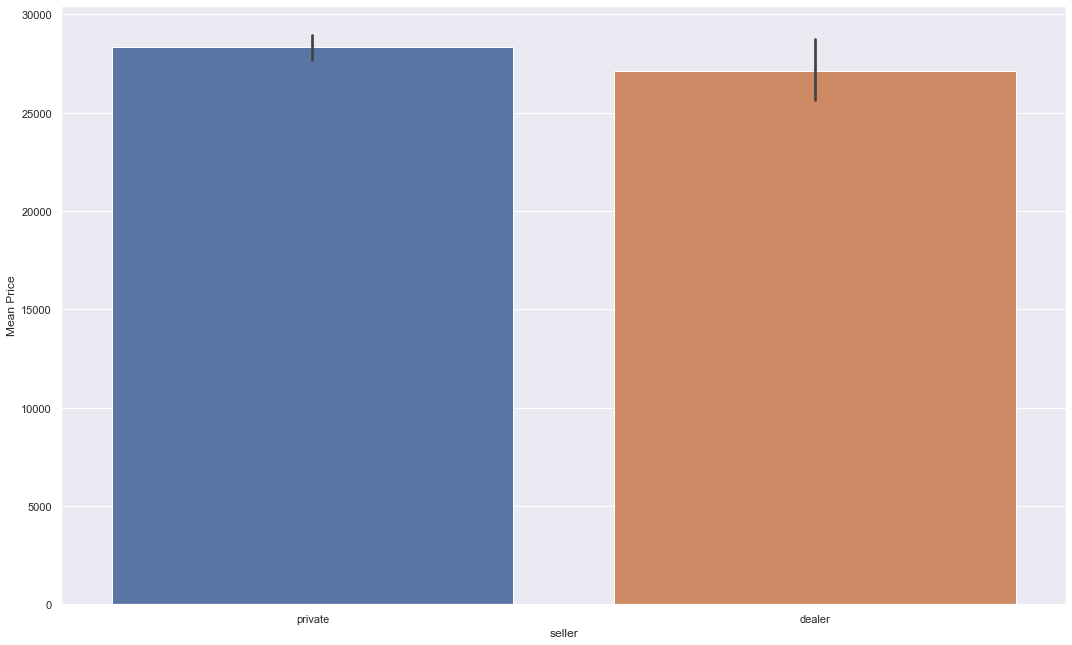

In [99]:
seller_price = sns.barplot(data = cars_df, x = "seller", y = "price")
seller_price.set_ylabel("Mean Price")
# looks like there isn't much price difference between sellers, confidence intervals overlap

### Cleaning the car "year" column

In [33]:
# viewing summary statistics for the year feature
cars_df["year"].describe()

count     9963
unique      44
top       2008
freq       461
Name: year, dtype: object

In [34]:
cars_df["year"].value_counts()
# only one strange record where "year" == 'consumer'

2008        461
2006        436
2004        412
2003        388
2007        384
2005        376
2013        366
2001        359
2016        350
2002        338
2015        327
2014        323
2000        318
2011        311
2017        310
2018        277
1995        273
2012        263
1999        250
1994        236
2022        229
2009        228
1996        227
2019        219
2010        211
1997        201
1991        187
2021        183
1992        176
2020        167
1993        161
1990        159
1998        157
1989        117
1988        115
1986        107
1987        106
1985         74
1984         56
1982         43
1983         42
1981         27
2023         12
consumer      1
Name: year, dtype: int64

In [35]:
cars_df[cars_df["year"] == 'consumer'] # extremely odd record, no year info to be found when accessing the URL
cars_df = cars_df[cars_df["year"] != 'consumer'] # removing the record
cars_df[cars_df["year"] == 'consumer'] # removed

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,reserve_status,num_views,end_datetime,num_photos,model_clean,id_split,mileage_clean,title,ZIP,trans


In [36]:
# viewing the most recent year from the listings
cars_df["year"].max()

'2023'

In [37]:
# viewing the earliest year from the listings
cars_df["year"].min()

'1981'

<AxesSubplot:xlabel='year', ylabel='count'>

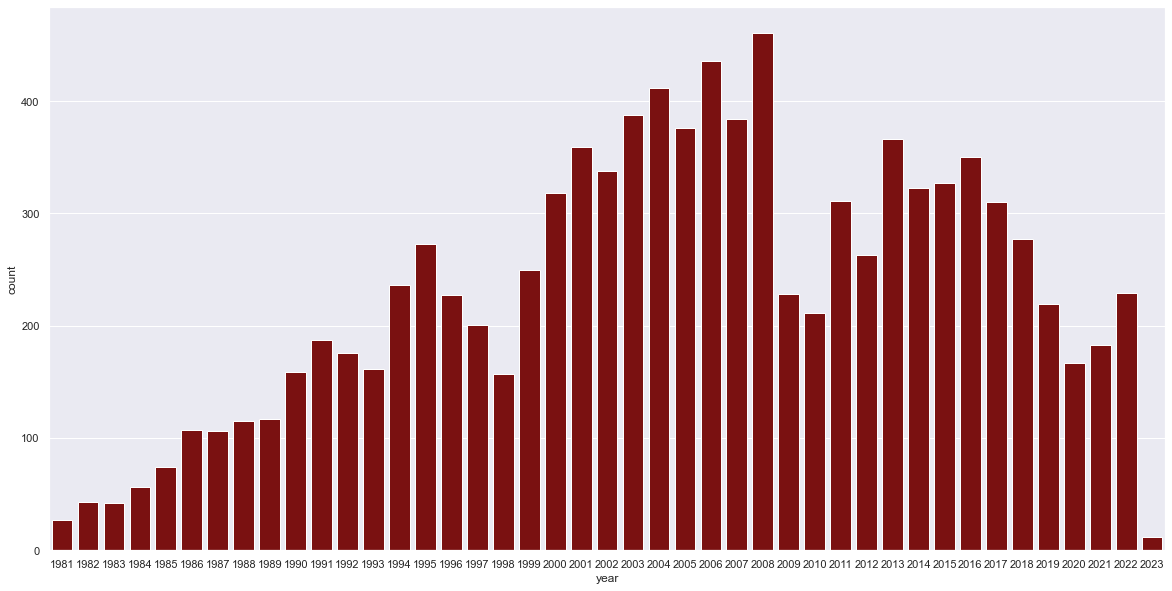

In [38]:
# plotting the distribution of car years
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data = cars_df.sort_values("year"), x = "year", color = "darkred") # lots of records from the mid 2000s
# TODO keep 'year' categorical or make it numeric?

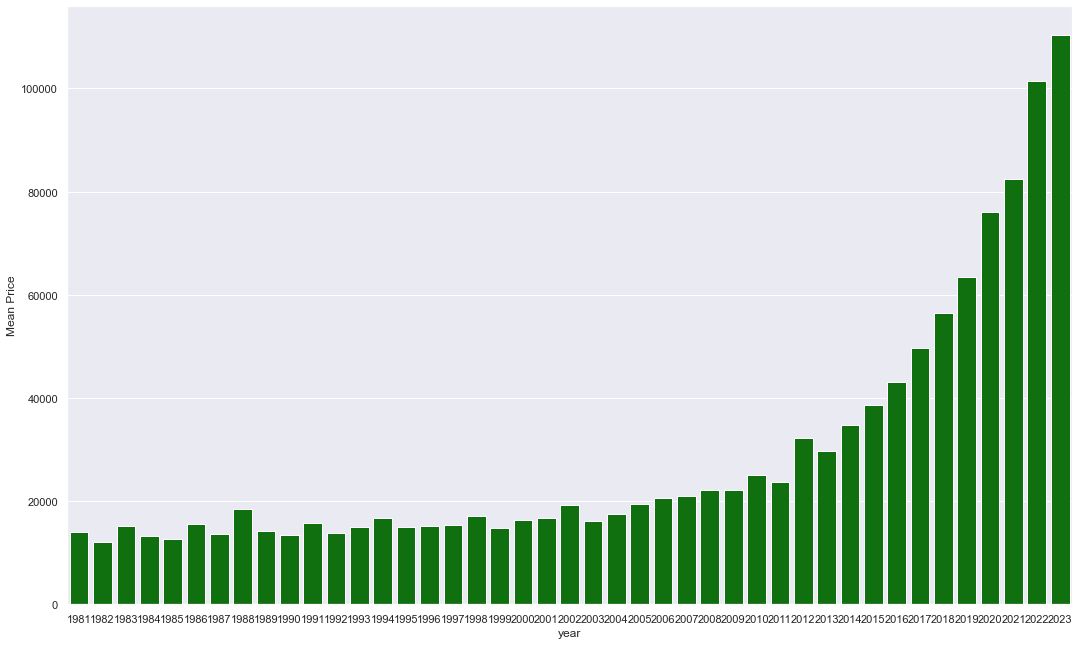

In [90]:
year_price = sns.barplot(data = cars_df.sort_values("year"), x = "year", y = "price", ci = False, color = "green")
year_price.set_ylabel("Mean Price")
plt.show()
# looks like newer cars are selling for more on average, makes sense

### Cleaning the auction_outcome column
- engineering new feature "outcome" which will take the values ("not sold", "sold")
- Only listings that sold will be used in modeling, 'reserve not met' listings will be useful for vis

In [39]:
cars_df["auction_outcome"].value_counts()

Reserve not met, bid to     2028
Sold toAoC93                  42
Sold tosellmeanother1975      38
Sold toDiamondMotorworks      29
Sold toiamRonin               28
                            ... 
Sold toThePuller               1
Sold toreggie5500              1
Sold toeswack6                 1
Sold toWaj90210                1
Sold toECRacer                 1
Name: auction_outcome, Length: 6692, dtype: int64

In [40]:
# creating the 'outcome' column
cars_df["outcome"] = np.where(cars_df["auction_outcome"].str.lower().str.contains("reserve not met"), "not sold", "sold")

In [41]:
cars_df["outcome"].value_counts() # clean

sold        7934
not sold    2028
Name: outcome, dtype: int64

Text(0, 0.5, 'Mean Price')

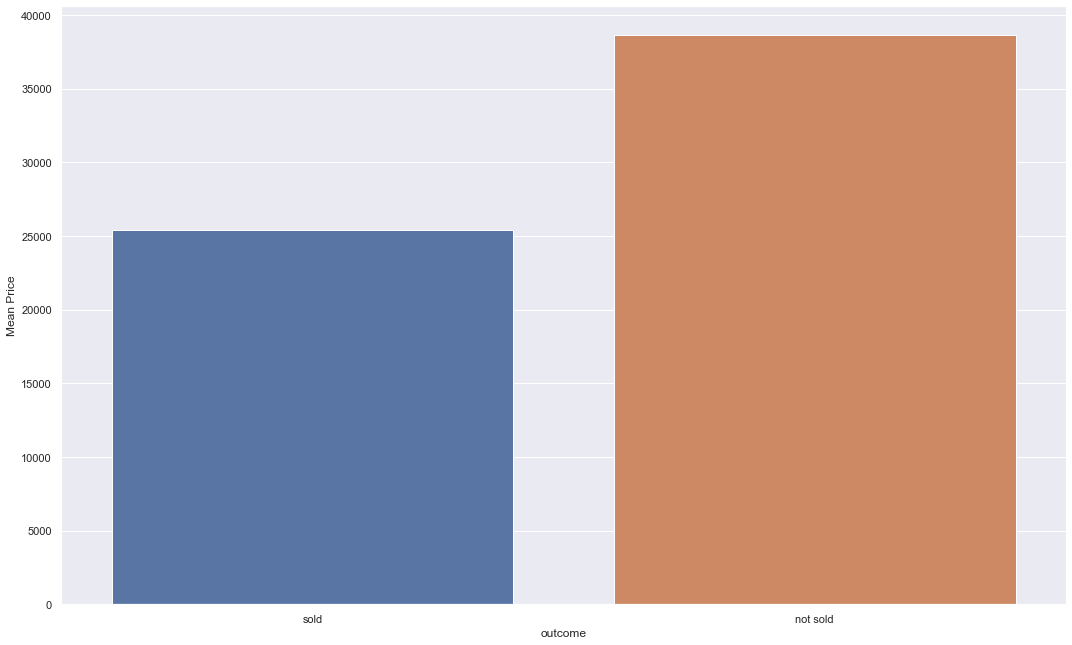

In [79]:
# plotting mean price for each outcome category
outcome_price = sns.barplot(data = cars_df, x = "outcome", y = "price", ci = False)
outcome_price.set_ylabel("Mean Price")

### Cleaning the 'bid_count' feature

In [42]:
cars_df["bid_count"].describe() #clean

count    9962.000000
mean       28.311785
std        13.447805
min         1.000000
25%        18.000000
50%        27.000000
75%        37.000000
max       139.000000
Name: bid_count, dtype: float64

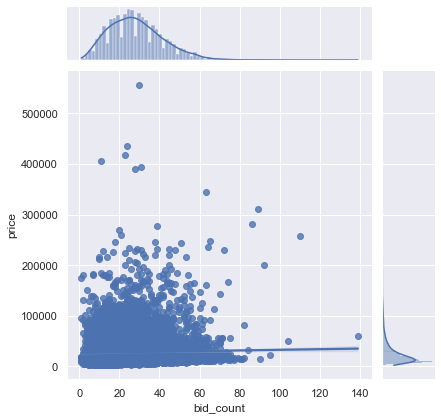

In [71]:
sns.jointplot(data = cars_df, x = "bid_count", y = "price", kind = "reg")

### Cleaning the 'reserve_status' feature

In [43]:
cars_df["reserve_status"].value_counts() #clean

Reserve       6007
No reserve    3955
Name: reserve_status, dtype: int64

Text(0, 0.5, 'Mean Price')

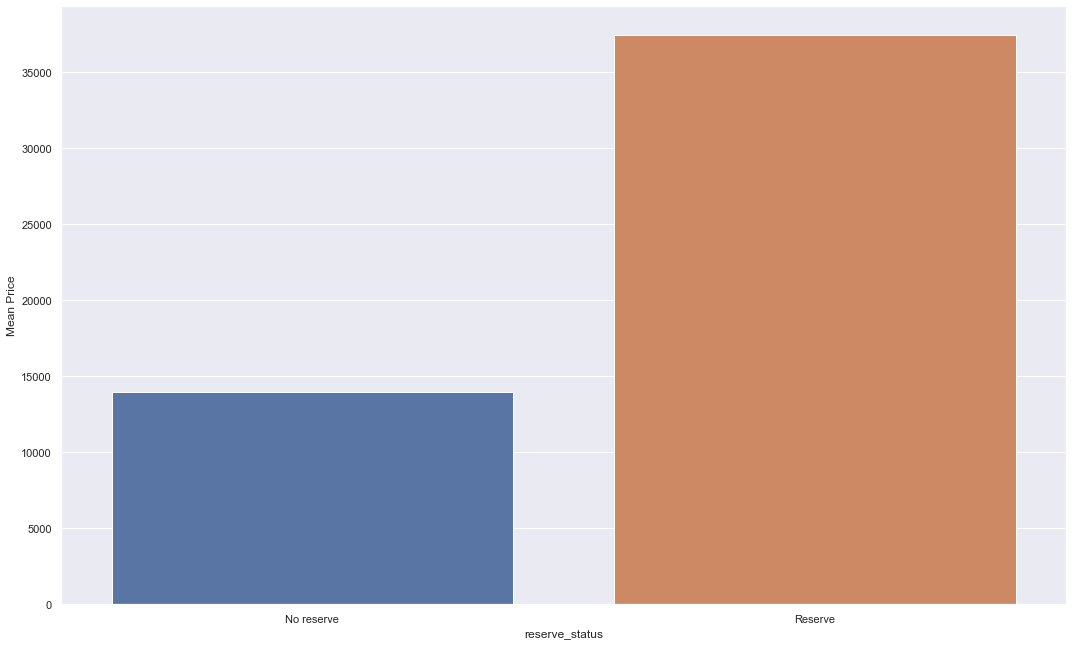

In [80]:
reserve_status_price = sns.barplot(data = cars_df, x = "reserve_status", y = "price", ci = False)
reserve_status_price.set_ylabel("Mean Price")

### Cleaning the 'num_views' feature
- imputing values for the missing data in case the feature proves useful

<AxesSubplot:xlabel='num_views'>

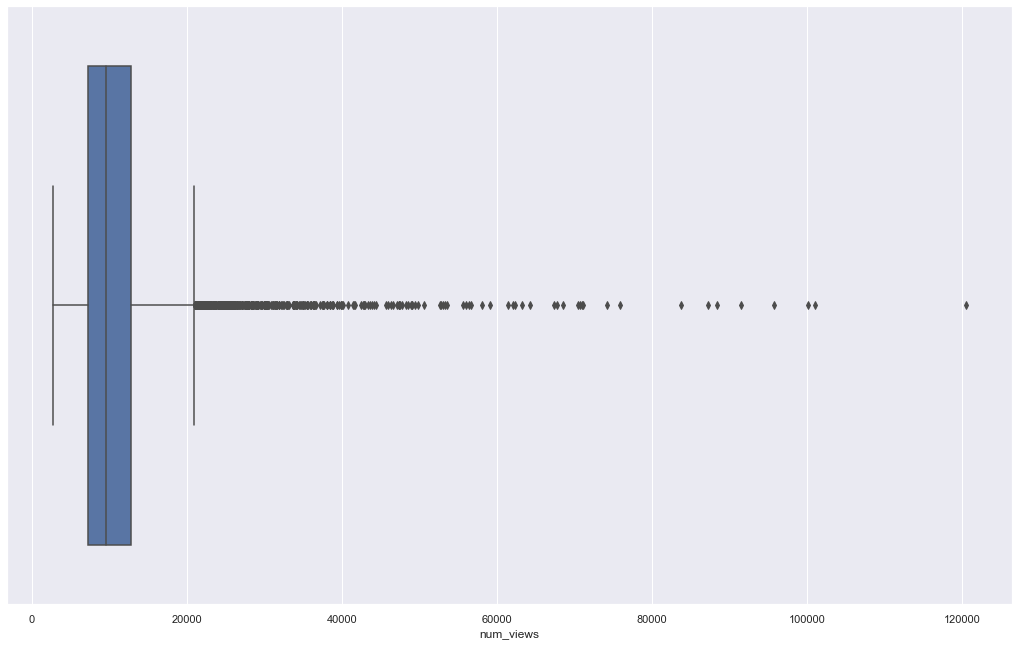

In [61]:
cars_df["num_views"].describe()
sns.boxplot(data = cars_df, x = "num_views")

In [81]:
# using median value imputation to impute the missing values for num_views--the number of views a listing page receives
# median was chosen because of the large number of outliers skewing the mean
num_views_price = cars_df["num_views"].fillna(cars_df["num_views"].median())
num_views_price.set_ylabel("Mean Price")

AttributeError: 'Series' object has no attribute 'set_ylabel'

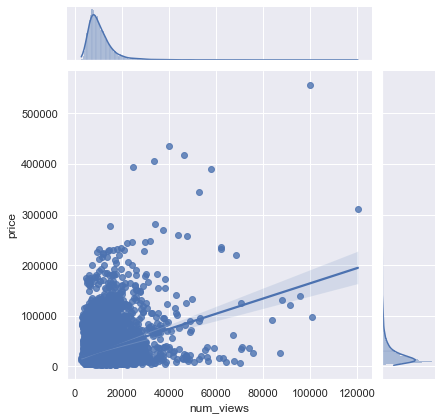

In [70]:
sns.jointplot(data = cars_df, x = "num_views", y = "price", kind = "reg")

### Changing the auction end format to datetime

In [46]:
# using pd.to_datetime on the end_datetime column. Date format from the scrape is standardized and the time zone is present
cars_df["end_datetime"] = pd.to_datetime(cars_df["end_datetime"])
cars_df[cars_df["end_datetime"].isna()] # no missing valuesb

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,num_views,end_datetime,num_photos,model_clean,id_split,mileage_clean,title,ZIP,trans,outcome


In [47]:
# checking summary statistics for the auction dates
cars_df["end_datetime"].describe(datetime_is_numeric = True) # great datetime handling from describe btw
# earliest auction was June 15, 2020--site has been live for a little over 2 years

count                                   9962
mean     2021-11-14 08:57:55.157598720-05:00
min                2020-06-15 12:00:00-04:00
25%                2021-05-13 13:52:30-04:00
50%                2021-11-30 15:38:30-05:00
75%                2022-06-14 14:25:45-04:00
max                2022-11-18 15:50:00-05:00
Name: end_datetime, dtype: object

In [48]:
# checking the total range of dates from earliest to most recent listing
days_span = cars_df["end_datetime"].max() - cars_df["end_datetime"].min()
months_span = len(pd.date_range(start=cars_df["end_datetime"].min(),end=cars_df["end_datetime"].max(),freq='M'))

print(f"The listings span {days_span} or {months_span} months")
# plot the distribution with monthly breaks (29 breaks)

The listings span 886 days 04:50:00 or 29 months


<AxesSubplot:xlabel='end_datetime', ylabel='Count'>

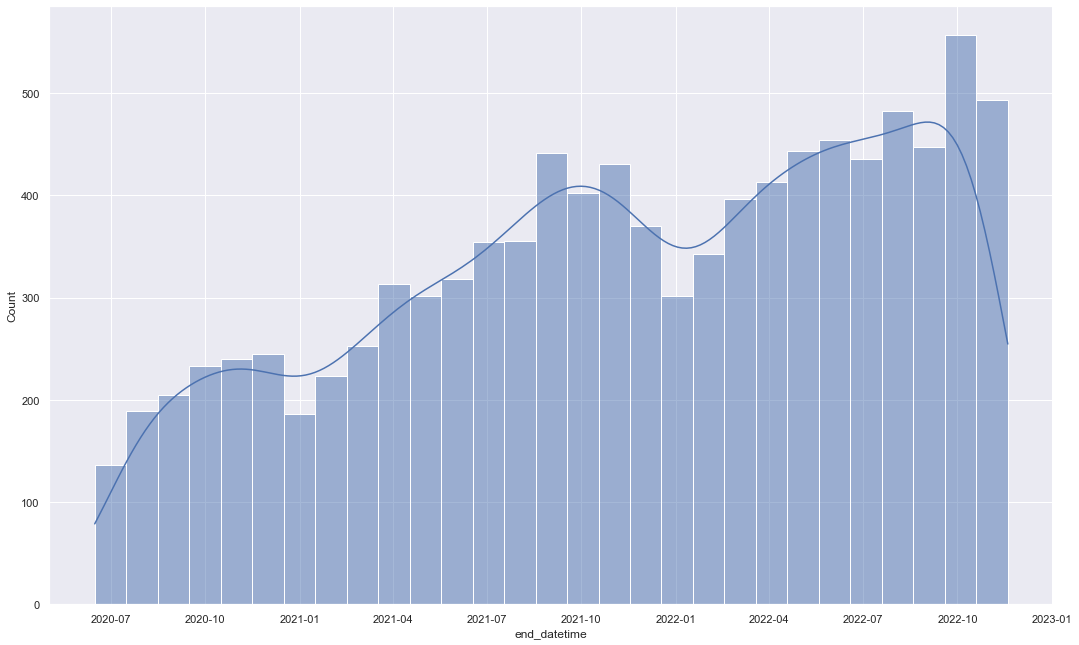

In [49]:
# plotting the distribution over time
sns.set(rc={'figure.figsize':(18,11)}) # enlarging the plot so x-axis is legible
sns.histplot(cars_df["end_datetime"], kde=True, bins = 29)

In [50]:
# feature engineering the day of the week an auction ended on

In [52]:
cars_df["end_weekday"] = cars_df["end_datetime"].dt.day_name()
cars_df["end_weekday"].head()

0      Friday
1      Friday
2    Thursday
3    Thursday
4    Thursday
Name: end_weekday, dtype: object

<AxesSubplot:xlabel='end_weekday', ylabel='count'>

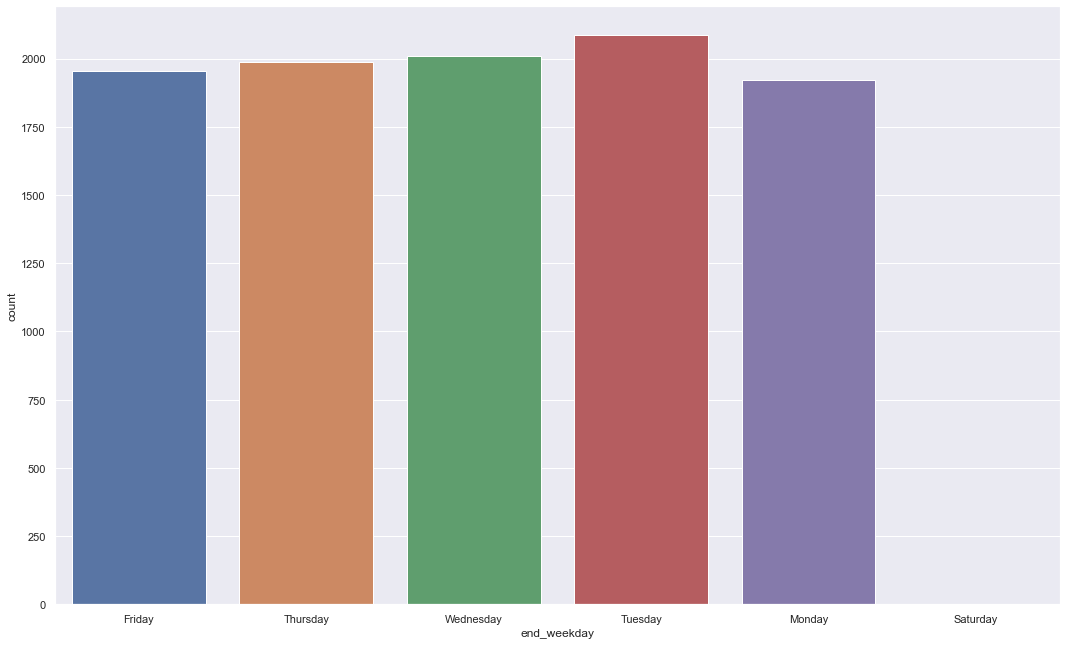

In [56]:
sns.countplot(data = cars_df, x = "end_weekday")

<AxesSubplot:xlabel='end_weekday', ylabel='price'>

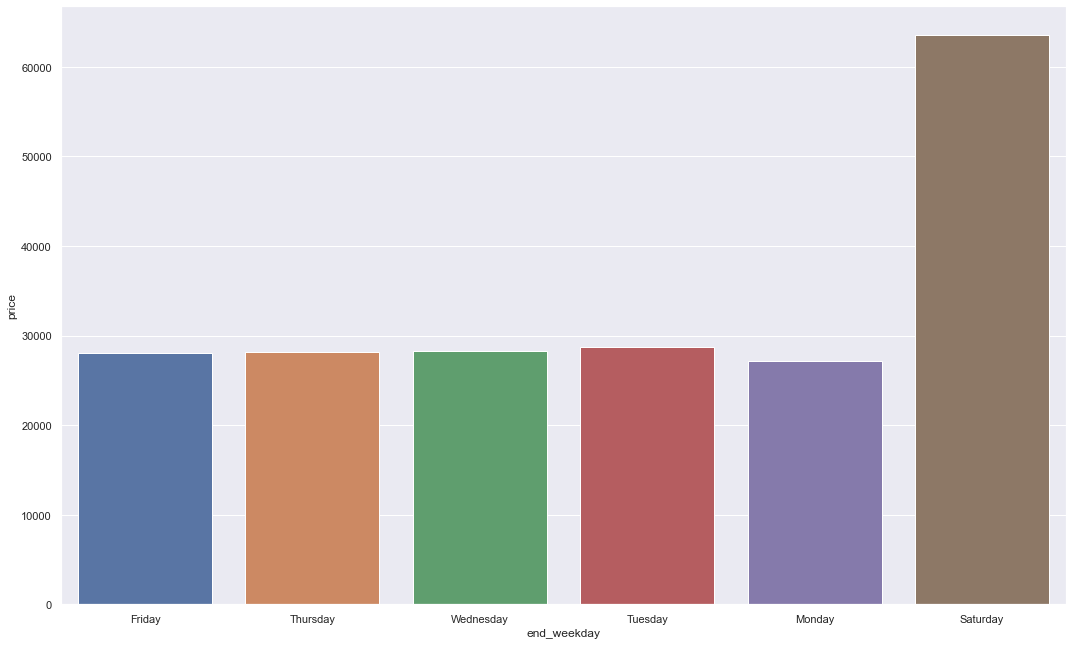

In [59]:
sns.barplot(data = cars_df, x = "end_weekday", y = "price", ci = False)

In [60]:
# !NOTE! the one auction ending on a Saturday is shown below:
# this was an anomaly case, auctions are only supposed to take place M-F
# The car did not sell, and therefore will not be included in the final model
# Very nice 850CSi though...
cars_df[cars_df["end_weekday"] == "Saturday"]

,make,model,mileage,vin,title_status,location,seller,engine,drivetrain,transmission,...,end_datetime,num_photos,model_clean,id_split,mileage_clean,title,ZIP,trans,outcome,end_weekday
8993,BMW,850CSiSave,"106,700",WBSEG9323RCD00125,Clean (CA),"Encino, CA 91316",private,5.6L V12,Rear-wheel drive,Manual (6-speed),...,2020-11-07 16:10:00-05:00,197,850CSi,"[1994, bmw, 850csi]",106700.0,clean,91316,manual,not sold,Saturday


### Cleaning the 'num_photos' feature

In [53]:
cars_df["num_photos"].describe() # clean, no missing values

count    9962.000000
mean      116.972295
std        46.757421
min        37.000000
25%        83.000000
50%       106.000000
75%       140.000000
max       443.000000
Name: num_photos, dtype: float64

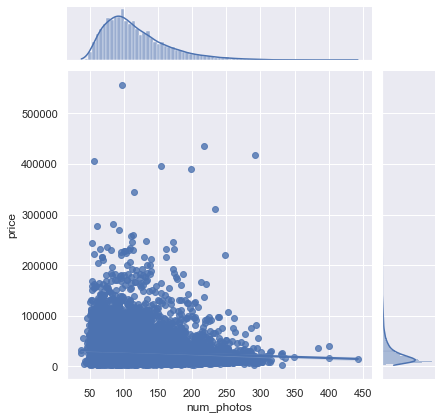

In [69]:
sns.jointplot(data = cars_df, x = "num_photos" , y = "price", kind = "reg")